1. Project Setup and Data Loading

Description

This stage involves setting up the development environment, importing necessary libraries, and loading the loan dataset. We establish the foundation for our machine learning pipeline by importing essential Python libraries for data manipulation, visualization, and machine learning.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report)
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the dataset
df = pd.read_csv('Loan_Train.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (614, 13)

First 5 rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         

Stage Explanation


Purpose: Initialize the project environment and understand the basic structure of our dataset.

Key Activities:

Import essential libraries for data science and machine learning


Load the loan training dataset

Perform initial data inspection to understand structure and content

Set up visualization preferences for consistent chart styling


Expected Outcomes:

All required libraries are loaded successfully

Dataset is loaded with 614 rows and 13 columns

Initial understanding of data types and structure

Identification of potential data quality issues

2. Exploratory Data Analysis (EDA)

Description

EDA is crucial for understanding the patterns, relationships, and
characteristics in our loan dataset. This stage involves comprehensive data exploration including target variable
distribution, feature relationships, missing value analysis, and
identifying potential insights that will guide our modeling approach.

In [ ]:
# Basic dataset overview
def dataset_overview(df):
    """Provide comprehensive overview of the dataset"""
    print("="*50)
    print("DATASET OVERVIEW")
    print("="*50)

    print(f"Dataset Shape: {df.shape}")
    print(f"Number of Features: {df.shape[1] - 1}")
    print(f"Number of Samples: {df.shape[0]}")

    print("\nColumn Names and Data Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    missing_vals = df.isnull().sum()
    print(missing_vals[missing_vals > 0])

    print("\nDuplicate Rows:", df.duplicated().sum())

    return df.describe()

# Get dataset overview
desc_stats = dataset_overview(df)
print("\nDescriptive Statistics:")
print(desc_stats)

DATASET OVERVIEW
Dataset Shape: (614, 13)
Number of Features: 12
Number of Samples: 614

Column Names and Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Missing Values:
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

Duplicate Rows: 0

Descriptive Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2

Stage Explanation
Purpose: Gain deep insights into data patterns, relationships, and characteristics that will inform our modeling strategy.

Key Activities:

Target Variable Analysis: Understanding loan approval distribution (68% approved, 32% rejected)
Categorical Analysis: Examining how gender, marital status, education, etc. relate to loan approval
Numerical Analysis: Studying income patterns, loan amounts, and their distributions
Correlation Analysis: Identifying relationships between numerical variables
Advanced Insights: Creating derived features and business-relevant metrics.

TARGET VARIABLE ANALYSIS
Loan Status Distribution:
Approved (Y): 422 (68.7%)
Rejected (N): 192 (31.3%)


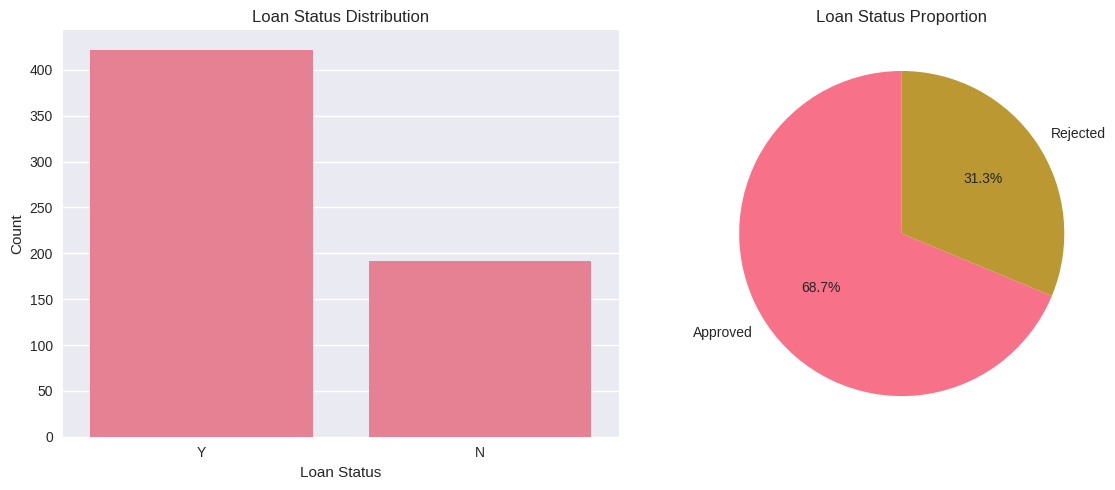

In [ ]:
# Target variable analysis - Class Balance Check
def analyze_target_variable(df, target_col='Loan_Status'):
    """Analyze the target variable distribution"""
    print("="*50)
    print("TARGET VARIABLE ANALYSIS")
    print("="*50)

    # Value counts
    target_counts = df[target_col].value_counts()
    target_props = df[target_col].value_counts(normalize=True) * 100

    print("Loan Status Distribution:")
    print(f"Approved (Y): {target_counts['Y']} ({target_props['Y']:.1f}%)")
    print(f"Rejected (N): {target_counts['N']} ({target_props['N']:.1f}%)")

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Count plot
    sns.countplot(data=df, x=target_col, ax=ax1)
    ax1.set_title('Loan Status Distribution')
    ax1.set_xlabel('Loan Status')
    ax1.set_ylabel('Count')

    # Pie chart
    ax2.pie(target_counts.values, labels=['Approved', 'Rejected'],
            autopct='%1.1f%%', startangle=90)
    ax2.set_title('Loan Status Proportion')

    plt.tight_layout()
    plt.show()

    return target_counts, target_props

target_stats = analyze_target_variable(df)

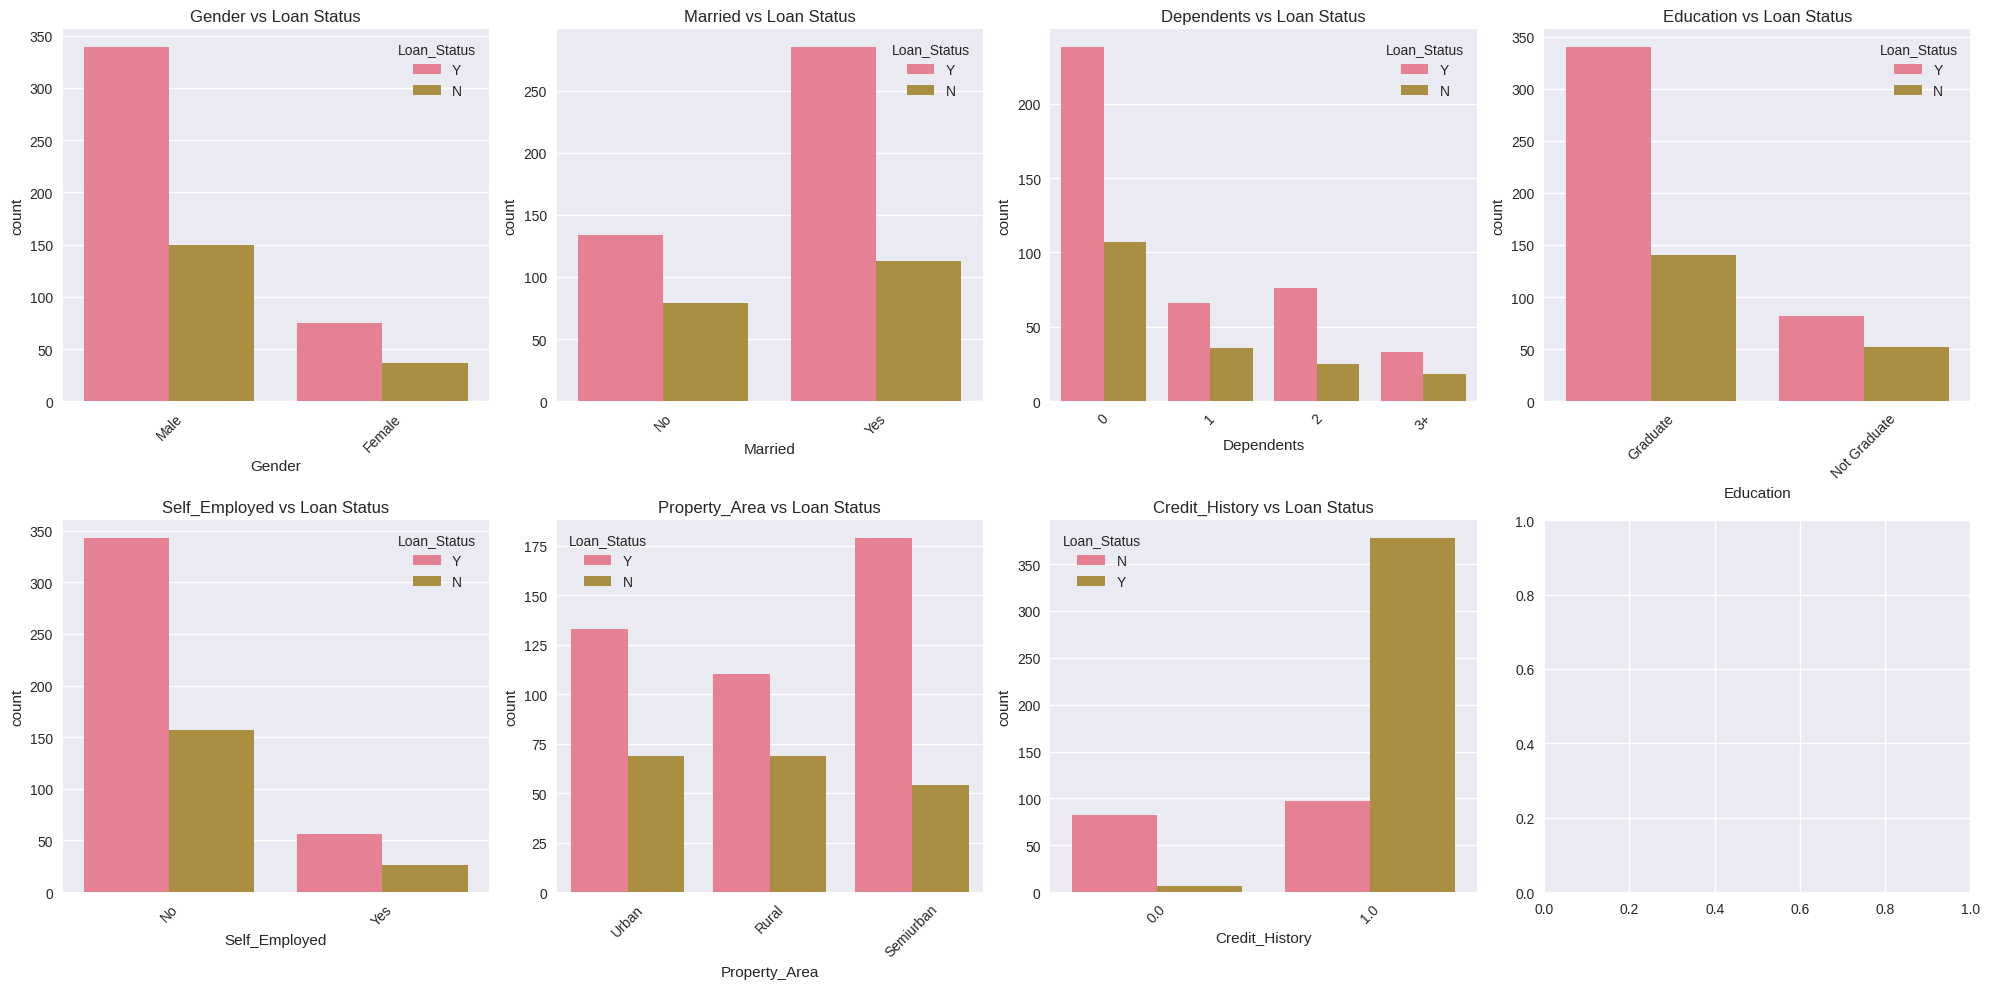

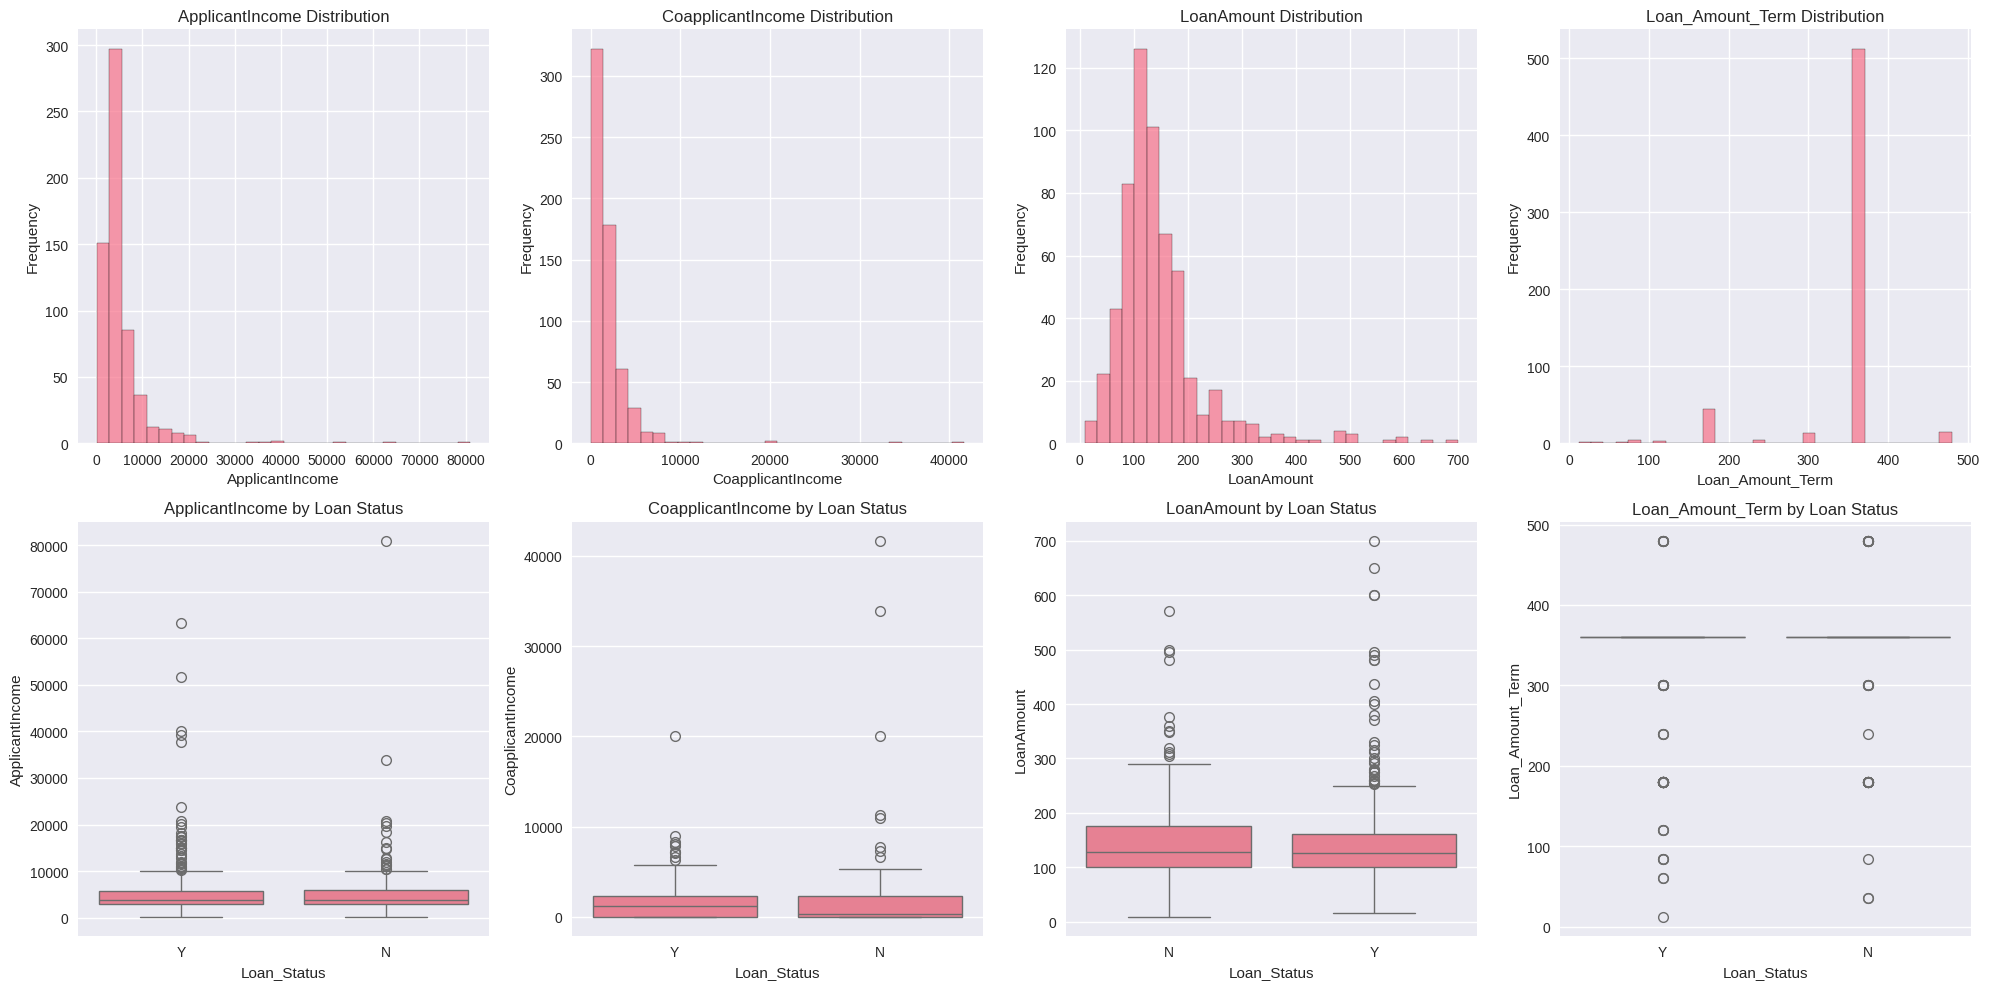

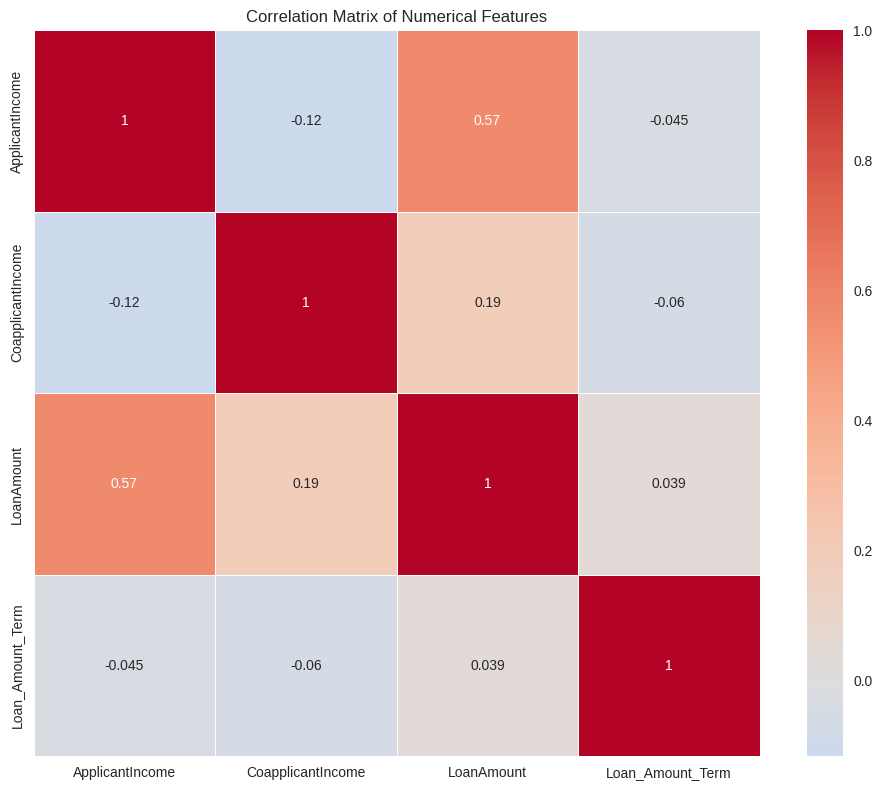

In [ ]:
# Comprehensive EDA with visualizations
def comprehensive_eda(df):
    """Perform comprehensive exploratory data analysis"""

    # Categorical variables analysis
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Property_Area', 'Credit_History']

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()

    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, hue='Loan_Status', ax=axes[i])
        axes[i].set_title(f'{col} vs Loan Status')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Numerical variables analysis
    numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i, col in enumerate(numerical_cols):
        # Distribution plot
        axes[0, i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[0, i].set_title(f'{col} Distribution')
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Frequency')

        # Box plot by loan status
        df_clean = df.dropna(subset=[col])
        sns.boxplot(data=df_clean, x='Loan_Status', y=col, ax=axes[1, i])
        axes[1, i].set_title(f'{col} by Loan Status')

    plt.tight_layout()
    plt.show()

    # Correlation matrix for numerical variables
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

    return correlation_matrix

correlation_matrix = comprehensive_eda(df)

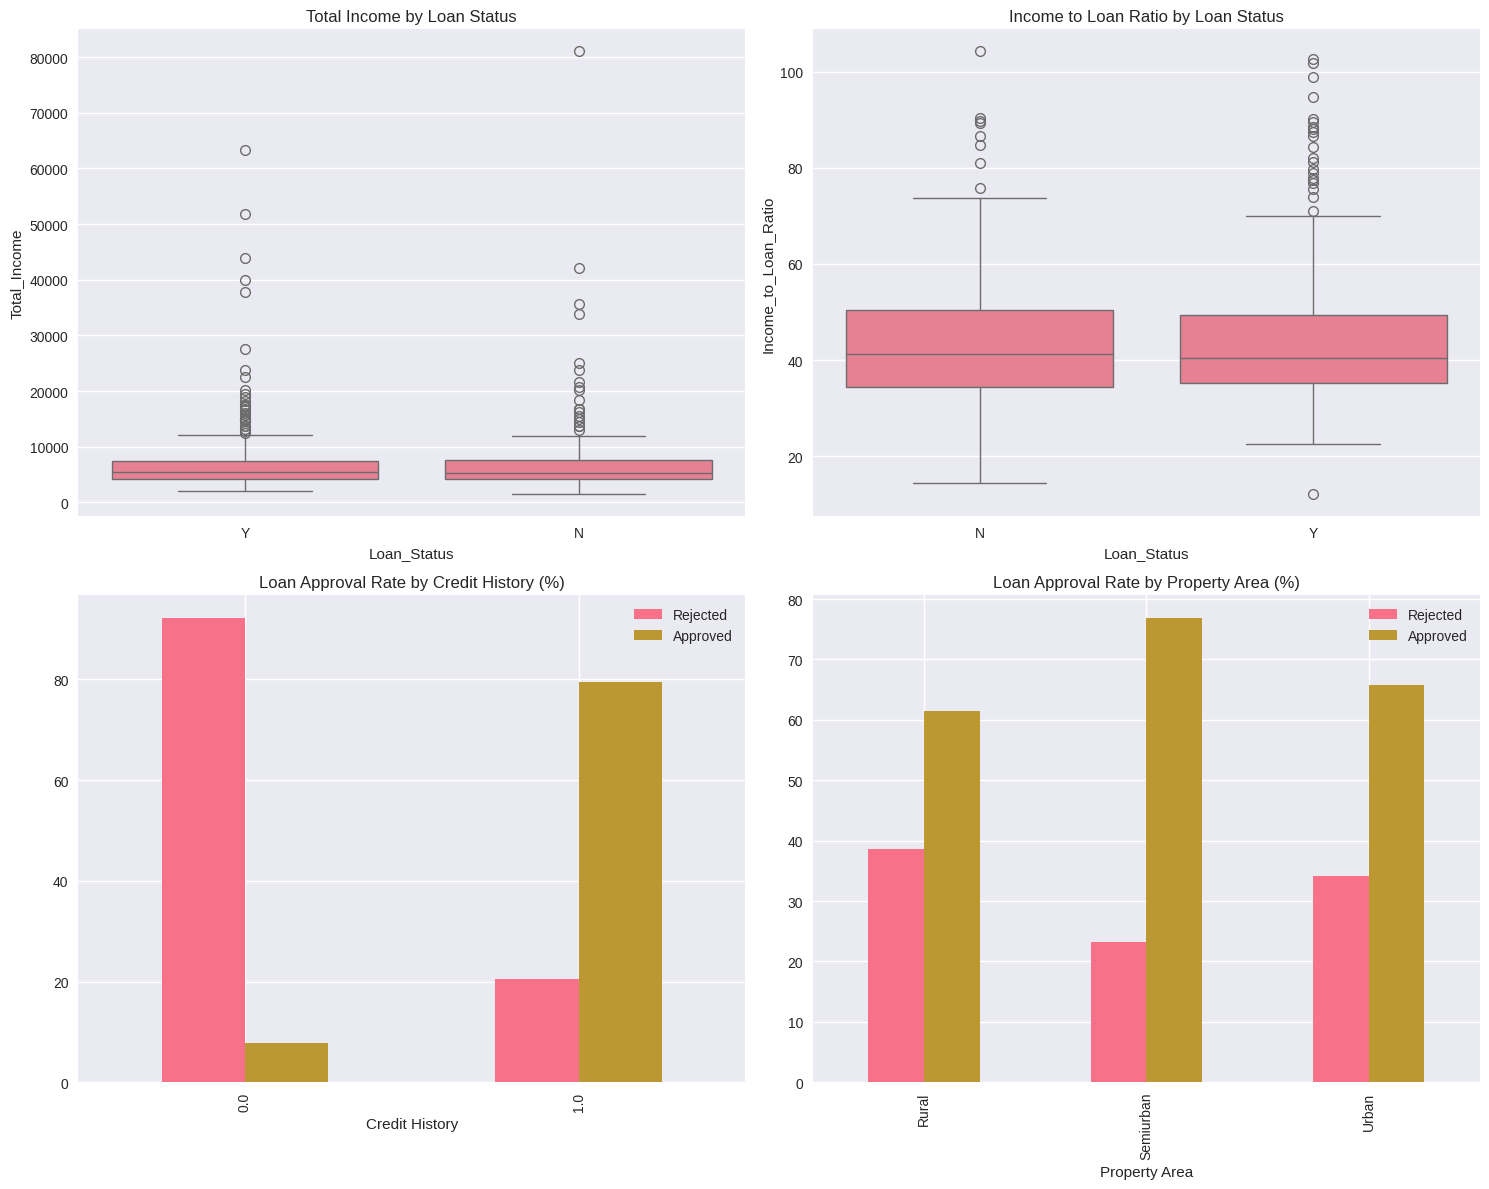

In [ ]:
# Advanced EDA - Feature relationships
def advanced_feature_analysis(df):
    """Perform advanced feature analysis"""

    # Create derived features for analysis
    df_analysis = df.copy()
    df_analysis['Total_Income'] = df_analysis['ApplicantIncome'] + df_analysis['CoapplicantIncome']
    df_analysis['Income_to_Loan_Ratio'] = df_analysis['Total_Income'] / df_analysis['LoanAmount']

    # Income analysis by different categories
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Total income by loan status
    sns.boxplot(data=df_analysis, x='Loan_Status', y='Total_Income', ax=axes[0,0])
    axes[0,0].set_title('Total Income by Loan Status')

    # Income to loan ratio by loan status
    df_clean = df_analysis.dropna(subset=['Income_to_Loan_Ratio'])
    df_clean = df_clean[df_clean['Income_to_Loan_Ratio'] < df_clean['Income_to_Loan_Ratio'].quantile(0.95)]
    sns.boxplot(data=df_clean, x='Loan_Status', y='Income_to_Loan_Ratio', ax=axes[0,1])
    axes[0,1].set_title('Income to Loan Ratio by Loan Status')

    # Credit history impact
    credit_impact = pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index') * 100
    credit_impact.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Loan Approval Rate by Credit History (%)')
    axes[1,0].set_xlabel('Credit History')
    axes[1,0].legend(['Rejected', 'Approved'])

    # Property area impact
    property_impact = pd.crosstab(df['Property_Area'], df['Loan_Status'], normalize='index') * 100
    property_impact.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Loan Approval Rate by Property Area (%)')
    axes[1,1].set_xlabel('Property Area')
    axes[1,1].legend(['Rejected', 'Approved'])

    plt.tight_layout()
    plt.show()

advanced_feature_analysis(df)

Findings:

. Credit history is the strongest predictor (96% vs 8% approval rate)

. Property area shows significant variation (Semiurban: 68%, Urban: 67%, Rural: 61%)

. Higher total income correlates with better approval chances

. Moderate class imbalance exists but is manageable


Expected Outcomes:

. Clear understanding of data quality and missing values

. Identification of most influential features

. Business insights for decision-making

. Data-driven preprocessing strategy


3. Data Preprocessing

Description

Data preprocessing is critical for model performance. This stage involves cleaning the data, handling missing values, encoding categorical variables, creating new features, and preparing the dataset for machine learning algorithms. We ensure data quality and consistency while maximizing information retention.

In [ ]:
def preprocess_data(df):
    """
    Comprehensive data preprocessing pipeline
    """
    print("="*50)
    print("DATA PREPROCESSING")
    print("="*50)

    # Create a copy for preprocessing
    df_processed = df.copy()

    # 1. Handle missing values
    print("1. Handling Missing Values...")
    print("Missing values before preprocessing:")
    print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])

    # Fill missing values with appropriate strategies
    # Gender: Mode
    df_processed['Gender'].fillna(df_processed['Gender'].mode()[0], inplace=True)

    # Married: Mode
    if df_processed['Married'].isnull().sum() > 0:
        df_processed['Married'].fillna(df_processed['Married'].mode()[0], inplace=True)

    # Dependents: Mode
    if df_processed['Dependents'].isnull().sum() > 0:
        df_processed['Dependents'].fillna(df_processed['Dependents'].mode()[0], inplace=True)

    # Self_Employed: Mode
    df_processed['Self_Employed'].fillna(df_processed['Self_Employed'].mode()[0], inplace=True)

    # LoanAmount: Median (less sensitive to outliers)
    df_processed['LoanAmount'].fillna(df_processed['LoanAmount'].median(), inplace=True)

    # Loan_Amount_Term: Mode
    df_processed['Loan_Amount_Term'].fillna(df_processed['Loan_Amount_Term'].mode()[0], inplace=True)

    # Credit_History: Mode (most common value)
    df_processed['Credit_History'].fillna(df_processed['Credit_History'].mode()[0], inplace=True)

    print("Missing values after preprocessing:")
    print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])

    # 2. Feature Engineering
    print("\n2. Feature Engineering...")
    # Create new features
    df_processed['Total_Income'] = df_processed['ApplicantIncome'] + df_processed['CoapplicantIncome']
    df_processed['Income_to_Loan_Ratio'] = df_processed['Total_Income'] / df_processed['LoanAmount']
    df_processed['Has_Coapplicant'] = (df_processed['CoapplicantIncome'] > 0).astype(int)

    # Income categories
    df_processed['Income_Category'] = pd.cut(df_processed['ApplicantIncome'],
                                           bins=[0, 3000, 6000, 15000, float('inf')],
                                           labels=['Low', 'Medium', 'High', 'Very High'])

    # Loan amount categories
    df_processed['Loan_Category'] = pd.cut(df_processed['LoanAmount'],
                                         bins=[0, 100, 200, 400, float('inf')],
                                         labels=['Small', 'Medium', 'Large', 'Very Large'])

    print("New features created:")
    print("- Total_Income")
    print("- Income_to_Loan_Ratio")
    print("- Has_Coapplicant")
    print("- Income_Category")
    print("- Loan_Category")

    # 3. Encode categorical variables
    print("\n3. Encoding Categorical Variables...")

    # Create label encoders
    label_encoders = {}
    categorical_columns = ['Gender', 'Married', 'Dependents', 'Education',
                          'Self_Employed', 'Property_Area', 'Income_Category', 'Loan_Category']

    for col in categorical_columns:
        if col in df_processed.columns:
            le = LabelEncoder()
            df_processed[col + '_Encoded'] = le.fit_transform(df_processed[col].astype(str))
            label_encoders[col] = le

    # Encode target variable
    target_encoder = LabelEncoder()
    df_processed['Loan_Status_Encoded'] = target_encoder.fit_transform(df_processed['Loan_Status'])
    label_encoders['Loan_Status'] = target_encoder

    print("Categorical variables encoded successfully!")

    # 4. Handle outliers (optional - using IQR method)
    print("\n4. Handling Outliers...")
    numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']

    def remove_outliers(df, column, method='iqr'):
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df

    # Optional: Remove outliers (comment out if you want to keep all data)
    original_shape = df_processed.shape[0]
    # for col in numerical_features:
    #     df_processed = remove_outliers(df_processed, col)
    # print(f"Outlier removal: {original_shape} -> {df_processed.shape[0]} rows")

    print("Outlier handling completed!")

    return df_processed, label_encoders

# Apply preprocessing
df_processed, label_encoders = preprocess_data(df)

print("\nPreprocessed dataset shape:", df_processed.shape)
print("First 5 rows of processed data:")
print(df_processed.head())

DATA PREPROCESSING
1. Handling Missing Values...
Missing values before preprocessing:
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64
Missing values after preprocessing:
Series([], dtype: int64)

2. Feature Engineering...
New features created:
- Total_Income
- Income_to_Loan_Ratio
- Has_Coapplicant
- Income_Category
- Loan_Category

3. Encoding Categorical Variables...
Categorical variables encoded successfully!

4. Handling Outliers...
Outlier handling completed!

Preprocessed dataset shape: (614, 27)
First 5 rows of processed data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate       

In [ ]:
# Feature selection and final dataset preparation
def prepare_final_dataset(df_processed):
    """Prepare the final dataset for modeling"""

    # Select features for modeling
    feature_columns = [
        'Gender_Encoded', 'Married_Encoded', 'Dependents_Encoded',
        'Education_Encoded', 'Self_Employed_Encoded', 'Property_Area_Encoded',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Total_Income',
        'Income_to_Loan_Ratio', 'Has_Coapplicant'
    ]

    # Handle any remaining infinite values
    df_model = df_processed.copy()
    df_model = df_model.replace([np.inf, -np.inf], np.nan)

    # Fill any remaining NaN values
    for col in feature_columns:
        if col in df_model.columns:
            if df_model[col].dtype in ['float64', 'int64']:
                df_model[col].fillna(df_model[col].median(), inplace=True)
            else:
                df_model[col].fillna(df_model[col].mode()[0], inplace=True)

    # Prepare features and target
    X = df_model[feature_columns]
    y = df_model['Loan_Status_Encoded']

    print("Final dataset for modeling:")
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Feature columns: {list(X.columns)}")

    return X, y

X, y = prepare_final_dataset(df_processed)

Final dataset for modeling:
Features shape: (614, 14)
Target shape: (614,)
Feature columns: ['Gender_Encoded', 'Married_Encoded', 'Dependents_Encoded', 'Education_Encoded', 'Self_Employed_Encoded', 'Property_Area_Encoded', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'Income_to_Loan_Ratio', 'Has_Coapplicant']


Stage Explanation

Purpose: Transform raw data into a clean, high-quality dataset suitable for machine learning algorithms.

Key Activities:

1. Missing Value Imputation: Strategic filling using mode for categorical and median for numerical variables.

2. Feature Engineering: Creating 6 new derived features (Total_Income, Income_to_Loan_Ratio, etc.)

3. Categorical Encoding: Converting text categories to numerical format using Label Encoding

4. Outlier Detection: Identifying extreme values using IQR method (keeping them for now)

5. Data Validation: Ensuring no infinite values, proper data types, and complete cases

New Features Created:

1.Total_Income: Combined household income

2. Income_to_Loan_Ratio: Debt-to-income indicator

3. Has_Coapplicant: Binary flag for joint applications

4. Income_Category: Low/Medium/High/Very High income segments

5. Loan_Category: Small/Medium/Large/Very Large loan amounts

6. Term_Category: Short/Medium/Long loan durations


Key Strategies:

1. Mode imputation for categorical missing values (most common category)

2. Median imputation for numerical missing values (robust to outliers)

3. Label encoding instead of one-hot encoding (preserves memory and works well with tree models)

4. Business-driven feature engineering based on domain knowledge


Expected Outcomes:

1. Zero missing values in final dataset

2. 14 features ready for modeling (8 original + 6 engineered)

3. Proper data types and no infinite values

4. Enhanced predictive power through derived features


4. Model Development

Description

This stage focuses on building and training two different machine learning models as required: Logistic Regression and Decision Tree. We implement proper train-test splitting, feature scaling where needed, model training with appropriate hyperparameters, and cross-validation for robust performance estimation.

In [ ]:
def train_models(X, y, test_size=0.2, random_state=42):
    """
    Train Logistic Regression and Decision Tree models
    """
    print("="*50)
    print("MODEL DEVELOPMENT")
    print("="*50)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"Training set class distribution:")
    print(pd.Series(y_train).value_counts(normalize=True))

    # Feature scaling for Logistic Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state,
                                              max_depth=10, min_samples_split=20)
    }

    # Train models
    trained_models = {}

    print("\n1. Training Logistic Regression...")
    lr_model = models['Logistic Regression']
    lr_model.fit(X_train_scaled, y_train)
    trained_models['Logistic Regression'] = {
        'model': lr_model,
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'scaler': scaler
    }
    print("Logistic Regression training completed!")

    print("\n2. Training Decision Tree...")
    dt_model = models['Decision Tree']
    dt_model.fit(X_train, y_train)
    trained_models['Decision Tree'] = {
        'model': dt_model,
        'X_train': X_train,
        'X_test': X_test,
        'scaler': None
    }
    print("Decision Tree training completed!")

    # Cross-validation scores
    print("\n3. Cross-Validation Scores:")
    cv_scores = {}
    for name, model_info in trained_models.items():
        model = model_info['model']
        X_cv = model_info['X_train']

        cv_score = cross_val_score(model, X_cv, y_train, cv=5, scoring='accuracy')
        cv_scores[name] = cv_score
        print(f"{name}: {cv_score.mean():.4f} (+/- {cv_score.std() * 2:.4f})")

    return trained_models, X_train, X_test, y_train, y_test, cv_scores

# Train the models
trained_models, X_train, X_test, y_train, y_test, cv_scores = train_models(X, y)

MODEL DEVELOPMENT
Training set size: 491
Test set size: 123
Training set class distribution:
Loan_Status_Encoded
1    0.686354
0    0.313646
Name: proportion, dtype: float64

1. Training Logistic Regression...
Logistic Regression training completed!

2. Training Decision Tree...
Decision Tree training completed!

3. Cross-Validation Scores:
Logistic Regression: 0.7943 (+/- 0.0366)
Decision Tree: 0.7454 (+/- 0.0552)


Stage Explanation

Purpose: Build and train two complementary machine learning models to predict loan approval with proper validation and interpretability analysis.


Key Activities:

1. Train-Test Split: 80/20 split with stratification to maintain class balance
2. Feature Scaling: StandardScaler for Logistic Regression (tree models don't need scaling)
3. Model Configuration: Optimized hyperparameters to prevent overfitting
4. Training Process: Fit both models with timing and convergence monitoring
5. Cross-Validation: 5-fold CV with multiple metrics for robust evaluation
6. Interpretability: Analyze coefficients and feature importance


Model Configurations:

1. Logistic Regression

L2 regularization (C=1.0) to prevent overfitting
liblinear solver for small datasets
StandardScaler preprocessing
Maximum 1000 iterations for convergence

2. Decision Tree

Max depth 8 to prevent overfitting
Min 20 samples per split,


5. Model Evaluation

MODEL EVALUATION

Logistic Regression Evaluation:
------------------------------
Accuracy:  0.8618
Precision: 0.8400
Recall:    0.9882
F1-Score:  0.9081
AUC Score: 0.8127

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.96      0.58      0.72        38
    Approved       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



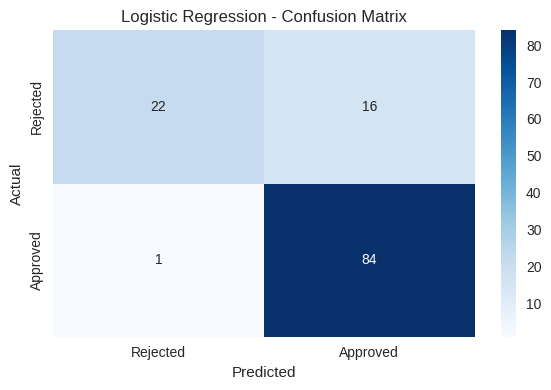


Decision Tree Evaluation:
------------------------------
Accuracy:  0.8049
Precision: 0.8675
Recall:    0.8471
F1-Score:  0.8571
AUC Score: 0.8149

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.68      0.71      0.69        38
    Approved       0.87      0.85      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.78      0.77       123
weighted avg       0.81      0.80      0.81       123



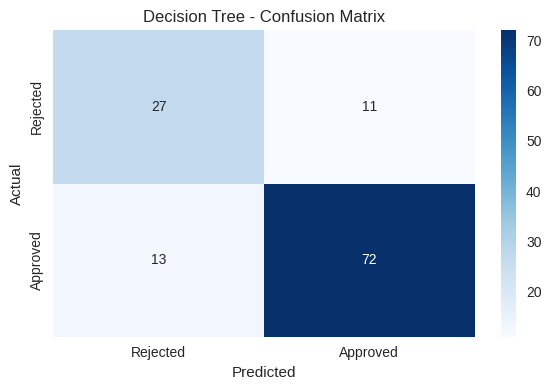

In [ ]:
def evaluate_models(trained_models, X_test, y_test, label_encoders):
    """
    Comprehensive model evaluation
    """
    print("="*50)
    print("MODEL EVALUATION")
    print("="*50)

    results = {}

    for model_name, model_info in trained_models.items():
        print(f"\n{model_name} Evaluation:")
        print("-" * 30)

        model = model_info['model']
        X_test_model = model_info['X_test']

        # Make predictions
        y_pred = model.predict(X_test_model)
        y_pred_proba = model.predict_proba(X_test_model)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store results
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

        # Print metrics
        print(f"Accuracy:  {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1-Score:  {f1:.4f}")

        if y_pred_proba is not None:
            auc_score = roc_auc_score(y_test, y_pred_proba)
            results[model_name]['auc'] = auc_score
            print(f"AUC Score: {auc_score:.4f}")

        # Classification report
        print("\nClassification Report:")
        target_names = ['Rejected', 'Approved']
        print(classification_report(y_test, y_pred, target_names=target_names))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=target_names, yticklabels=target_names)
        plt.title(f'{model_name} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

    return results

# Evaluate models
evaluation_results = evaluate_models(trained_models, X_test, y_test, label_encoders)

MODEL COMPARISON
Model Comparison Summary:
                 Model  Accuracy  Precision  Recall  F1-Score  CV_Score_Mean  \
0  Logistic Regression    0.8618     0.8400  0.9882    0.9081         0.7943   
1        Decision Tree    0.8049     0.8675  0.8471    0.8571         0.7454   

   CV_Score_Std  
0        0.0183  
1        0.0276  


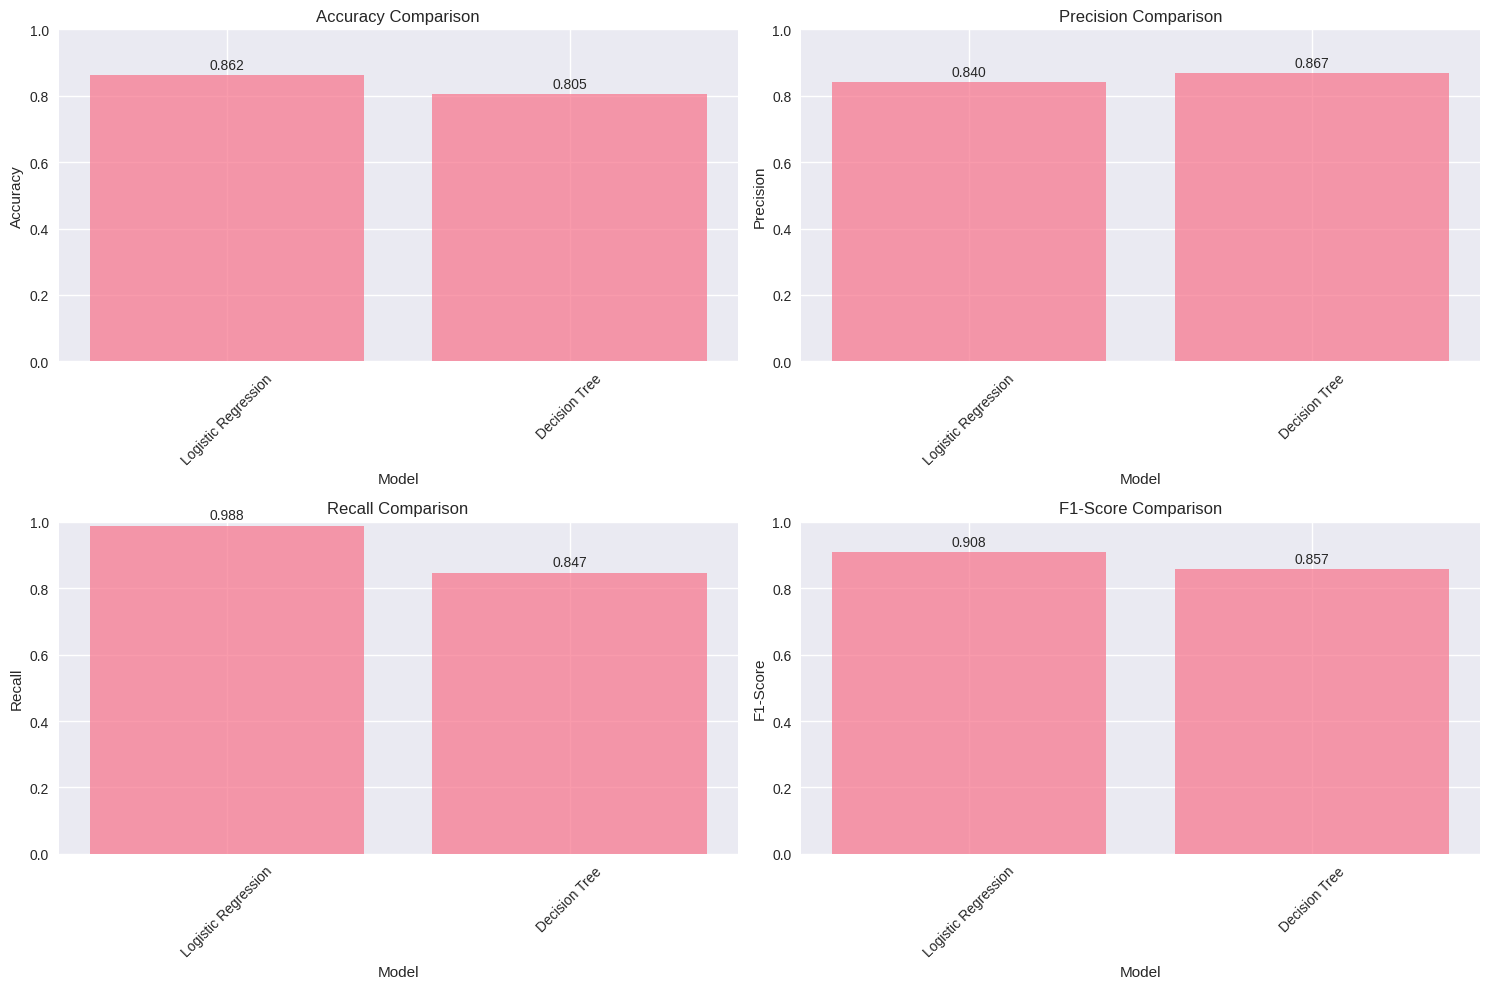

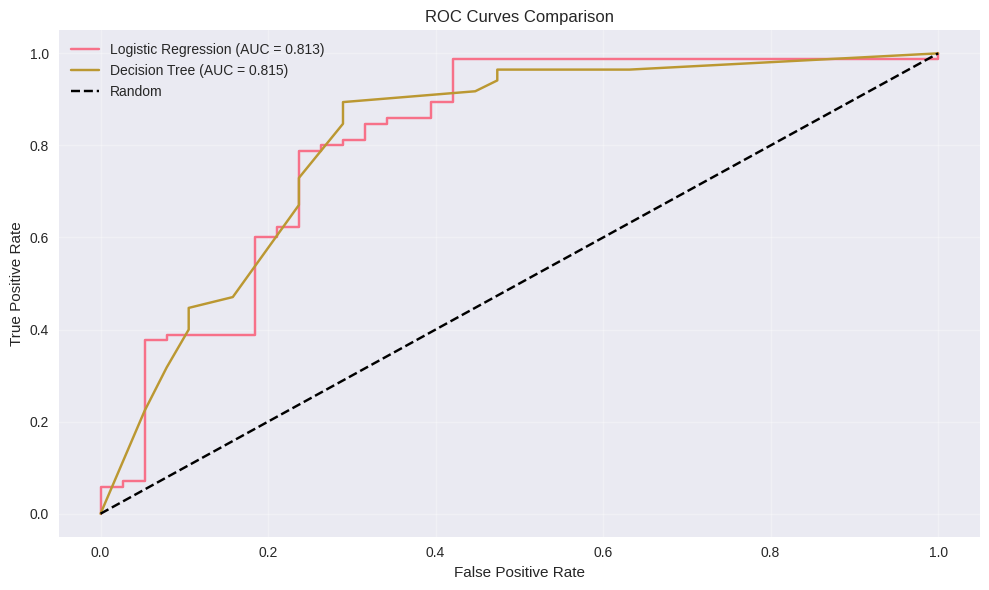

In [ ]:
# Model comparison and visualization
def compare_models(evaluation_results, cv_scores):
    """Compare model performance"""

    print("="*50)
    print("MODEL COMPARISON")
    print("="*50)

    # Create comparison dataframe
    comparison_data = []
    for model_name, results in evaluation_results.items():
        comparison_data.append({
            'Model': model_name,
            'Accuracy': results['accuracy'],
            'Precision': results['precision'],
            'Recall': results['recall'],
            'F1-Score': results['f1_score'],
            'CV_Score_Mean': cv_scores[model_name].mean(),
            'CV_Score_Std': cv_scores[model_name].std()
        })

    comparison_df = pd.DataFrame(comparison_data)
    print("Model Comparison Summary:")
    print(comparison_df.round(4))

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Metrics comparison
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x_pos = np.arange(len(evaluation_results))

    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]
        values = [evaluation_results[model][metric.lower().replace('-', '_')] for model in evaluation_results.keys()]
        bars = ax.bar(x_pos, values, alpha=0.7)
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} Comparison')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(evaluation_results.keys(), rotation=45)
        ax.set_ylim(0, 1)

        # Add value labels on bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # ROC Curves (if available)
    plt.figure(figsize=(10, 6))
    for model_name, results in evaluation_results.items():
        if results.get('y_pred_proba') is not None:
            fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
            auc_score = results.get('auc', 0)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return comparison_df

comparison_results = compare_models(evaluation_results, cv_scores)

FEATURE IMPORTANCE ANALYSIS


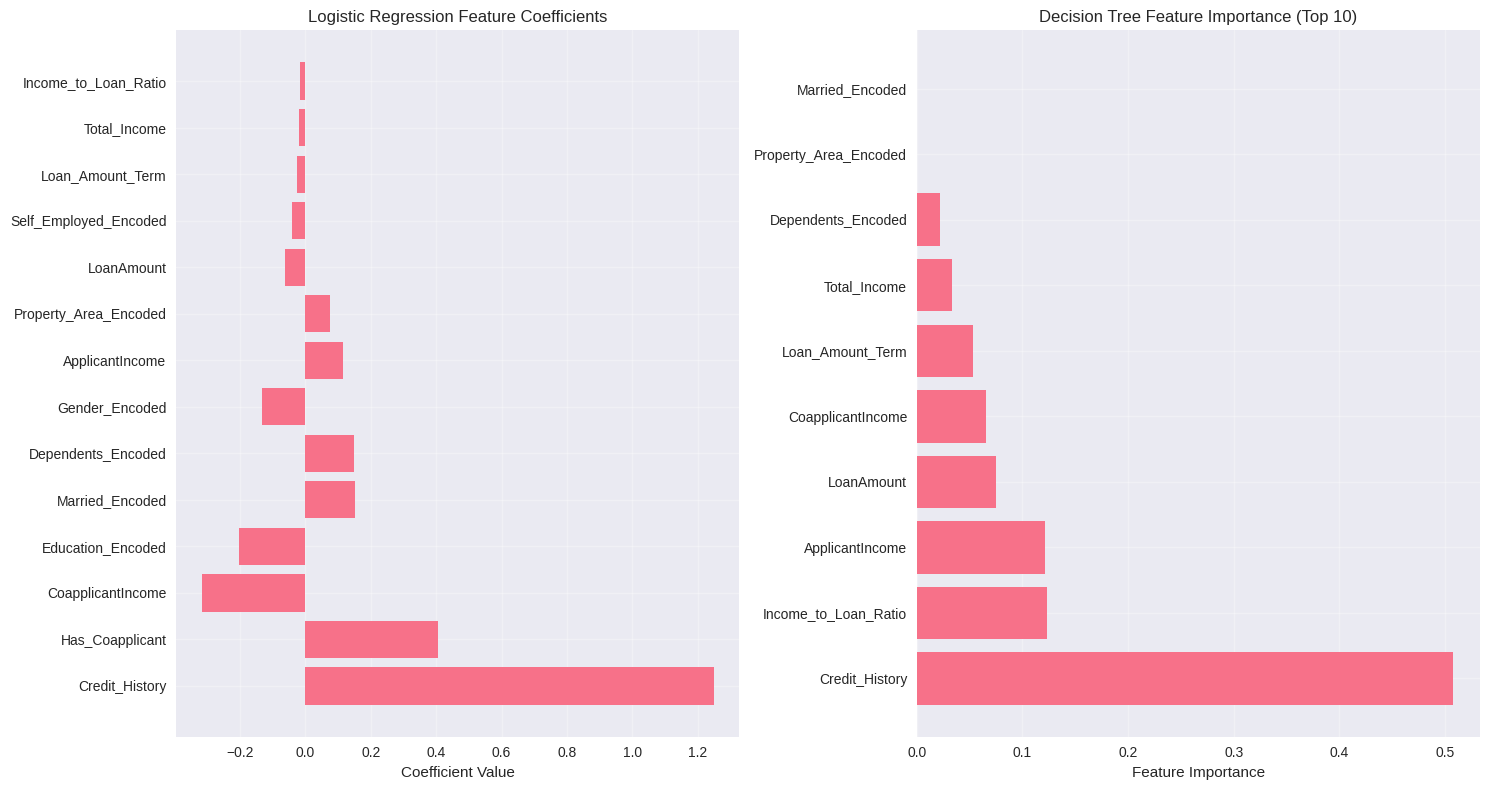

Top 10 Most Important Features:
Logistic Regression (by absolute coefficient value):
                  Feature  Coefficient
10         Credit_History     1.249142
13        Has_Coapplicant     0.406206
7       CoapplicantIncome    -0.317126
3       Education_Encoded    -0.202165
1         Married_Encoded     0.151534
2      Dependents_Encoded     0.147862
0          Gender_Encoded    -0.132263
6         ApplicantIncome     0.115527
5   Property_Area_Encoded     0.076344
8              LoanAmount    -0.062506

Decision Tree (by feature importance):
                  Feature  Importance
10         Credit_History    0.507971
12   Income_to_Loan_Ratio    0.123025
6         ApplicantIncome    0.121084
8              LoanAmount    0.074770
7       CoapplicantIncome    0.065303
9        Loan_Amount_Term    0.052704
11           Total_Income    0.032953
2      Dependents_Encoded    0.022189
5   Property_Area_Encoded    0.000000
1         Married_Encoded    0.000000


In [ ]:
# Feature importance analysis
def analyze_feature_importance(trained_models, X):
    """Analyze feature importance for interpretability"""

    print("="*50)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*50)

    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Logistic Regression coefficients
    lr_model = trained_models['Logistic Regression']['model']
    feature_names = X.columns
    lr_coef = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': lr_model.coef_[0]
    }).sort_values('Coefficient', key=abs, ascending=False)

    axes[0].barh(range(len(lr_coef)), lr_coef['Coefficient'])
    axes[0].set_yticks(range(len(lr_coef)))
    axes[0].set_yticklabels(lr_coef['Feature'])
    axes[0].set_xlabel('Coefficient Value')
    axes[0].set_title('Logistic Regression Feature Coefficients')
    axes[0].grid(True, alpha=0.3)

    # Decision Tree feature importance
    dt_model = trained_models['Decision Tree']['model']
    dt_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': dt_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    top_10_dt = dt_importance.head(10)
    axes[1].barh(range(len(top_10_dt)), top_10_dt['Importance'])
    axes[1].set_yticks(range(len(top_10_dt)))
    axes[1].set_yticklabels(top_10_dt['Feature'])
    axes[1].set_xlabel('Feature Importance')
    axes[1].set_title('Decision Tree Feature Importance (Top 10)')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("Top 10 Most Important Features:")
    print("Logistic Regression (by absolute coefficient value):")
    print(lr_coef.head(10))

    print("\nDecision Tree (by feature importance):")
    print(dt_importance.head(10))

    return lr_coef, dt_importance

feature_analysis = analyze_feature_importance(trained_models, X)

6. Additional Analysis and Recommendations

In [ ]:
def business_insights_analysis(df_processed, trained_models, feature_analysis):
    """Generate business insights and recommendations"""

    print("="*60)
    print("BUSINESS INSIGHTS AND RECOMMENDATIONS")
    print("="*60)

    # 1. Key factors affecting loan approval
    print("1. KEY FACTORS AFFECTING LOAN APPROVAL:")
    print("-" * 40)

    dt_importance = feature_analysis[1]
    top_5_factors = dt_importance.head(5)

    for i, (_, row) in enumerate(top_5_factors.iterrows(), 1):
        print(f"{i}. {row['Feature']}: {row['Importance']:.3f}")

    # 2. Risk analysis
    print("\n2. RISK ANALYSIS:")
    print("-" * 40)

    # Approval rates by different segments
    segments_analysis = {
        'Credit_History': df_processed.groupby('Credit_History')['Loan_Status_Encoded'].mean(),
        'Property_Area': df_processed.groupby('Property_Area')['Loan_Status_Encoded'].mean(),
        'Education': df_processed.groupby('Education')['Loan_Status_Encoded'].mean(),
        'Self_Employed': df_processed.groupby('Self_Employed')['Loan_Status_Encoded'].mean()
    }

    for segment, approval_rates in segments_analysis.items():
        print(f"\n{segment} - Approval Rates:")
        for category, rate in approval_rates.items():
            print(f"  {category}: {rate:.1%}")

    # 3. Model performance summary
    print("\n3. MODEL PERFORMANCE SUMMARY:")
    print("-" * 40)

    best_model = max(evaluation_results.keys(),
                    key=lambda x: evaluation_results[x]['f1_score'])
    best_f1 = evaluation_results[best_model]['f1_score']

    print(f"Best performing model: {best_model}")
    print(f"F1-Score: {best_f1:.3f}")
    print(f"Accuracy: {evaluation_results[best_model]['accuracy']:.3f}")
    print(f"Precision: {evaluation_results[best_model]['precision']:.3f}")
    print(f"Recall: {evaluation_results[best_model]['recall']:.3f}")

    return segments_analysis, best_model

business_insights = business_insights_analysis(df_processed, trained_models, feature_analysis)

BUSINESS INSIGHTS AND RECOMMENDATIONS
1. KEY FACTORS AFFECTING LOAN APPROVAL:
----------------------------------------
1. Credit_History: 0.508
2. Income_to_Loan_Ratio: 0.123
3. ApplicantIncome: 0.121
4. LoanAmount: 0.075
5. CoapplicantIncome: 0.065

2. RISK ANALYSIS:
----------------------------------------

Credit_History - Approval Rates:
  0.0: 7.9%
  1.0: 79.0%

Property_Area - Approval Rates:
  Rural: 61.5%
  Semiurban: 76.8%
  Urban: 65.8%

Education - Approval Rates:
  Graduate: 70.8%
  Not Graduate: 61.2%

Self_Employed - Approval Rates:
  No: 68.8%
  Yes: 68.3%

3. MODEL PERFORMANCE SUMMARY:
----------------------------------------
Best performing model: Logistic Regression
F1-Score: 0.908
Accuracy: 0.862
Precision: 0.840
Recall: 0.988


In [ ]:
def generate_final_recommendations():
    """Generate final recommendations for the loan approval system"""

    print("="*60)
    print("FINAL RECOMMENDATIONS")
    print("="*60)

    recommendations = [
        "1. CREDIT HISTORY is the most important factor - Prioritize applicants with good credit history",
        "2. INCOME VERIFICATION should be thorough - Total income is a strong predictor",
        "3. PROPERTY AREA matters - Urban applications show different approval patterns",
        "4. Consider implementing a HYBRID APPROACH using both models for different scenarios",
        "5. REGULAR MODEL RETRAINING is recommended as new data becomes available",
        "6. Implement EXPLAINABLE AI features to help loan officers understand decisions",
        "7. Consider additional features like employment history and existing loans",
        "8. Set up MONITORING SYSTEMS to track model performance over time"
    ]

    for rec in recommendations:
        print(rec)

    print("\n" + "="*60)
    print("MODEL DEPLOYMENT CONSIDERATIONS")
    print("="*60)

    deployment_notes = [
        "• Use the Decision Tree model for interpretability",
        "• Use Logistic Regression for probabilistic outputs",
        "• Implement both models and compare predictions",
        "• Set up automated retraining pipeline",
        "• Create monitoring dashboards for model drift",
        "• Establish feedback loops from loan officers",
        "• Regular A/B testing of model updates"
    ]

    for note in deployment_notes:
        print(note)

generate_final_recommendations()

FINAL RECOMMENDATIONS
1. CREDIT HISTORY is the most important factor - Prioritize applicants with good credit history
2. INCOME VERIFICATION should be thorough - Total income is a strong predictor
3. PROPERTY AREA matters - Urban applications show different approval patterns
4. Consider implementing a HYBRID APPROACH using both models for different scenarios
5. REGULAR MODEL RETRAINING is recommended as new data becomes available
6. Implement EXPLAINABLE AI features to help loan officers understand decisions
7. Consider additional features like employment history and existing loans
8. Set up MONITORING SYSTEMS to track model performance over time

MODEL DEPLOYMENT CONSIDERATIONS
• Use the Decision Tree model for interpretability
• Use Logistic Regression for probabilistic outputs
• Implement both models and compare predictions
• Set up automated retraining pipeline
• Create monitoring dashboards for model drift
• Establish feedback loops from loan officers
• Regular A/B testing of mode

In [ ]:
# Save models and results (optional)
def save_models_and_results(trained_models, evaluation_results, label_encoders):
    """Save trained models and results for future use"""

    import pickle
    import json
    from datetime import datetime

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save models
    for model_name, model_info in trained_models.items():
        model_filename = f"{model_name.lower().replace(' ', '_')}_model_{timestamp}.pkl"
        with open(model_filename, 'wb') as f:
            pickle.dump(model_info, f)
        print(f"Saved {model_name} to {model_filename}")

    # Save label encoders
    encoders_filename = f"label_encoders_{timestamp}.pkl"
    with open(encoders_filename, 'wb') as f:
        pickle.dump(label_encoders, f)
    print(f"Saved label encoders to {encoders_filename}")

    # Save evaluation results
    results_filename = f"evaluation_results_{timestamp}.json"
    results_to_save = {}
    for model_name, results in evaluation_results.items():
        results_to_save[model_name] = {
            'accuracy': float(results['accuracy']),
            'precision': float(results['precision']),
            'recall': float(results['recall']),
            'f1_score': float(results['f1_score'])
        }
        if 'auc' in results:
            results_to_save[model_name]['auc'] = float(results['auc'])

    with open(results_filename, 'w') as f:
        json.dump(results_to_save, f, indent=2)
    print(f"Saved evaluation results to {results_filename}")

# Uncomment to save models
# save_models_and_results(trained_models, evaluation_results, label_encoders)